In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

train = pd.read_csv("train_final.csv")

In [25]:
train = train.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1)

In [28]:
train = pd.get_dummies(train, columns=["dayname"], drop_first=True)

In [29]:
X = train.drop(['18~20_ride','date','station_name'],axis=1)
y = train['18~20_ride']

In [30]:
X.columns

Index(['id', 'bus_route_id', 'station_code', 'latitude', 'longitude',
       '6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride', '10~11_ride',
       '11~12_ride', '6~7_takeoff', '7~8_takeoff', '8~9_takeoff',
       '9~10_takeoff', '10~11_takeoff', '11~12_takeoff', 'region_e',
       'region_n', 'region_o', 'region_s', 'region_w', 'in_out_시내',
       'in_out_시외', 'rain_0', 'rain_1', 'rain_2', 'rain_3', 'dayname_Monday',
       'dayname_Saturday', 'dayname_Sunday', 'dayname_Thursday',
       'dayname_Tuesday', 'dayname_Wednesday'],
      dtype='object')

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)

## lasso

In [50]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
import numpy as np
import math

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train,y_train)

Lasso(alpha=0.01)

In [51]:
lasso_y_hat = lasso.predict(X_test)

In [54]:
lasso_r2 = r2_score(y_test,lasso_y_hat)
lasso_MSE = mean_squared_error(y_test,lasso_y_hat)

print('R2 score : %.2f' %(lasso_r2))
print('RMSE : %.2f' %math.sqrt(lasso_MSE))

R2 score : 0.38
RMSE : 0.31


In [45]:
lasso_result = []
alpha = [0.001,0.01,0.1,1,10]

for a in alpha:
  lasso = Lasso(alpha = a)

  lasso.fit(X_train,y_train)

  lasso_y_hat = lasso.predict(X_test)

  lasso_r2 = r2_score(y_test,lasso_y_hat)

  lasso_result.append(lasso_r2)

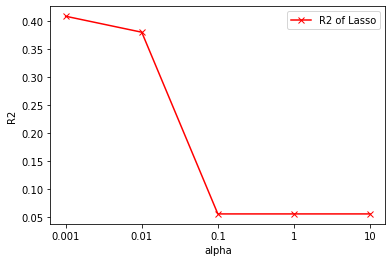

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(5), lasso_result, '-x', c='red', label="R2 of Lasso")
plt.xticks(range(5), alpha)
plt.xlabel('alpha')
plt.ylabel('R2')
plt.legend(loc='upper right')
plt.show()

## 랜덤포레스트

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

params = {
    'n_estimators':(100, 200),
    'max_depth' : (5, 8),
    'min_samples_leaf' : (8, 18),
    'min_samples_split' : (8, 16)
}
rf_run = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)
 
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 200}
최적 예측 정확도: 0.4269


In [33]:
# 랜덤포레스트 득점모델 학습
rf_run = RandomForestRegressor(random_state=0, max_depth=8, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=200, random_state=0)

In [38]:
# train rmse
train_predict = rf_run.predict(X_train)
print("훈련 세트 RMSE:{}".format(math.sqrt(mean_squared_error(train_predict, y_train))) )
 
# validation rmse
valid_predict = rf_run.predict(X_test)
print("테스트 세트 RMSE:{}".format(math.sqrt(mean_squared_error(valid_predict, y_test))) )

훈련 세트 RMSE:0.2938766448149335
테스트 세트 RMSE:0.29671545007641387


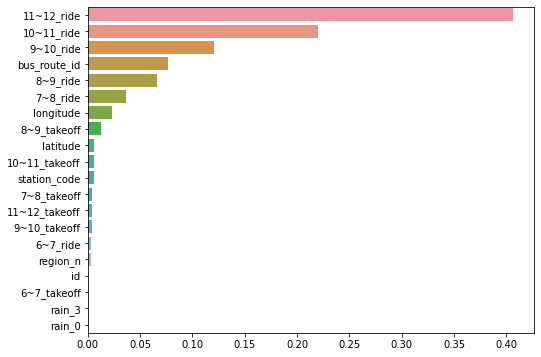

In [35]:
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
%matplotlib inline
 
ftr_importances_values = rf_run.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [56]:
X = X[['11~12_ride', '10~11_ride', '9~10_ride', 'bus_route_id', '8~9_ride', '7~8_ride', 'longitude','8~9_takeoff','latitude']]

In [58]:
X = train.drop(['18~20_ride','date','station_name'],axis=1)
y = train['18~20_ride']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)

In [ ]:
params = {
    'n_estimators':(100, 200,400),
    'max_depth' : (5, 10, 15, 20),
    'max_samples' : (0.2, 0.4, 0.7, 1.0),
    'min_samples_leaf' : (2, 4, 8, 18),
    'min_samples_split' : (4, 8, 16)
}
rf_run = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)
 
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))